In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [236]:
train_ori = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_ori = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [237]:
len(train_ori.columns)

81

In [238]:
train_ori.dtypes[train_ori.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

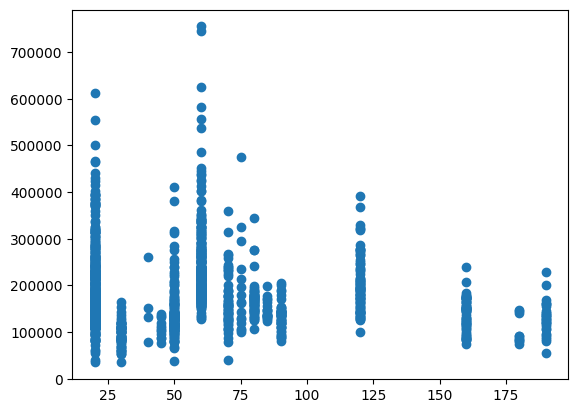

In [239]:
plt.scatter(x='MSSubClass',y='SalePrice', data = train_ori)

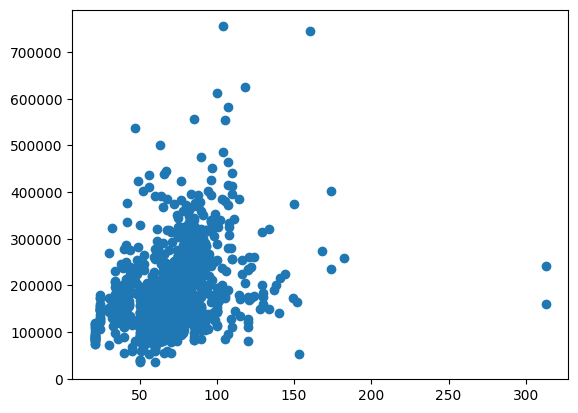

In [240]:
plt.scatter(x='LotFrontage',y='SalePrice', data = train_ori)

In [241]:
train_ori.query('LotFrontage > 300')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


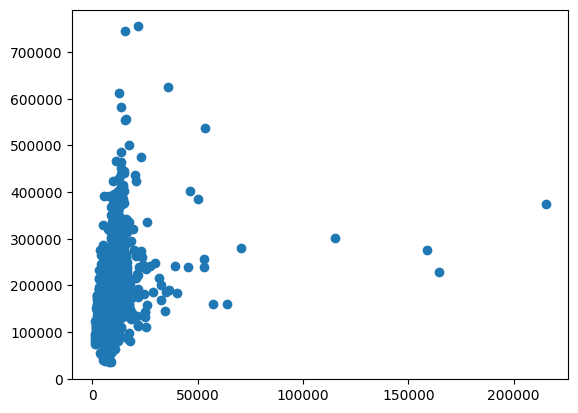

In [242]:
plt.scatter(x='LotArea',y='SalePrice', data = train_ori)

In [243]:
train_ori.query('LotArea > 150000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950


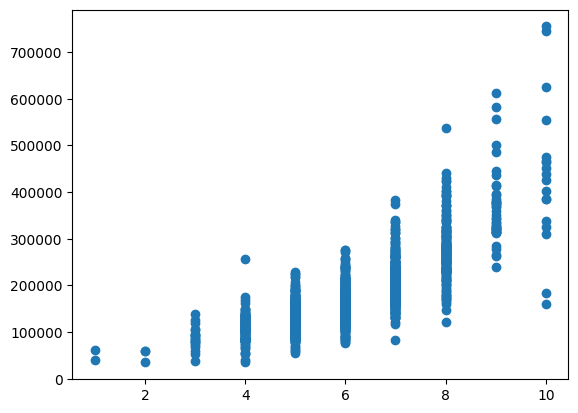

In [244]:
plt.scatter(x='OverallQual',y='SalePrice', data = train_ori)

In [245]:
train_ori.query('OverallQual ==10 and SalePrice<200000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


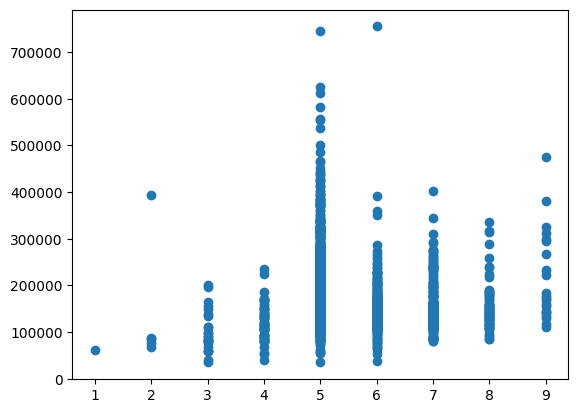

In [246]:
plt.scatter(x='OverallCond',y='SalePrice', data = train_ori)

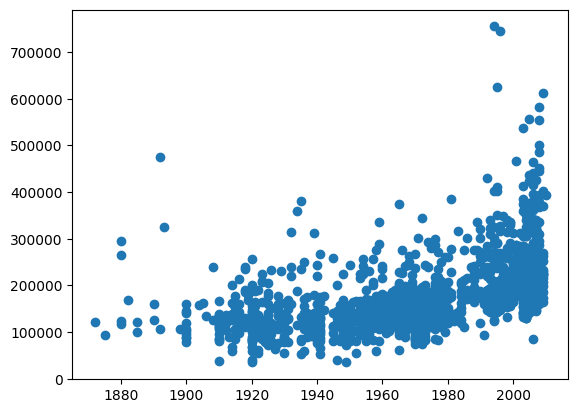

In [247]:
plt.scatter(x='YearBuilt',y='SalePrice', data = train_ori)

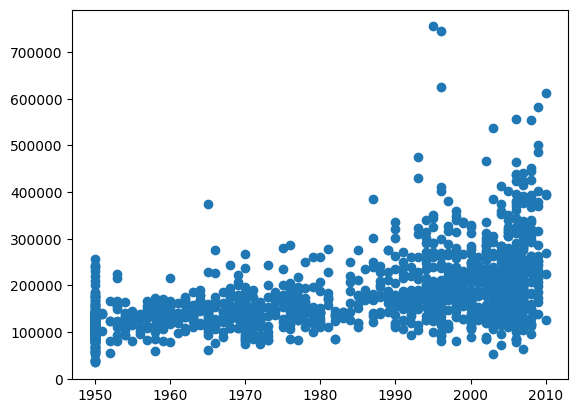

In [248]:
plt.scatter(x='YearRemodAdd',y='SalePrice', data = train_ori)

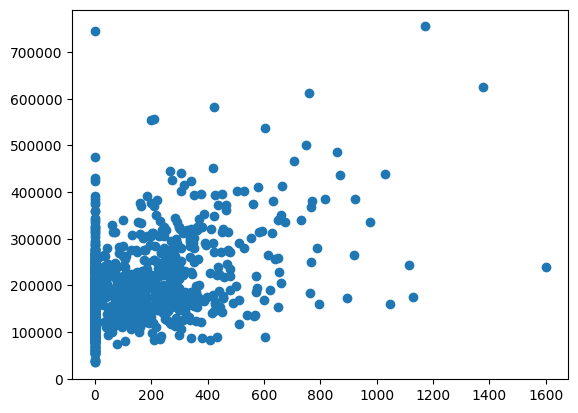

In [249]:
plt.scatter(x='MasVnrArea',y='SalePrice', data = train_ori)

In [250]:
train_ori.query('MasVnrArea ==1600')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


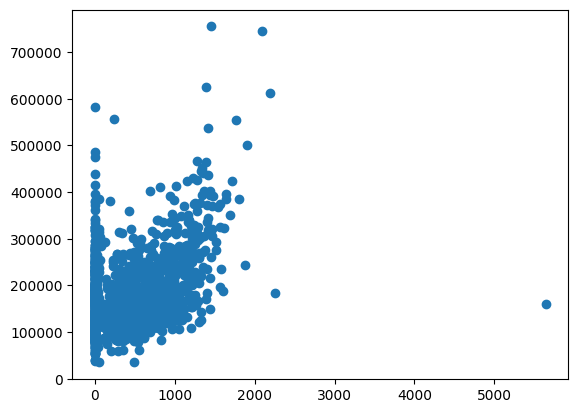

In [251]:
plt.scatter(x='BsmtFinSF1',y='SalePrice', data = train_ori)

In [252]:
train_ori.query('BsmtFinSF1>5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


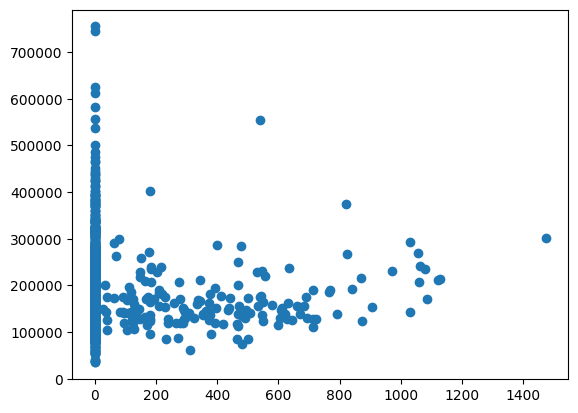

In [253]:
plt.scatter(x='BsmtFinSF2',y='SalePrice', data = train_ori)

In [254]:
train_ori.query('SalePrice>700000 and BsmtFinSF2==0')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


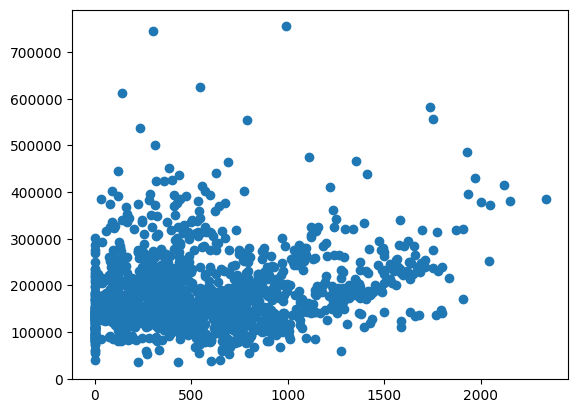

In [255]:
plt.scatter(x='BsmtUnfSF',y='SalePrice', data = train_ori)

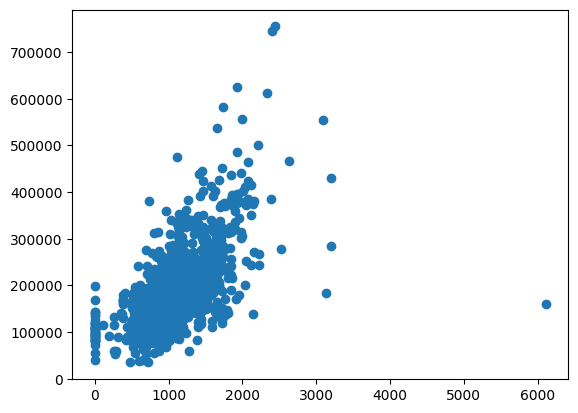

In [256]:
plt.scatter(x='TotalBsmtSF',y='SalePrice', data = train_ori)

In [257]:
train_ori.query('TotalBsmtSF > 6000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


# Changed the 1stFlrSF to fstFlrSF and 2ndFlrSF to sndFlrSF because they cannot run inside querry

In [258]:
train_ori.rename(columns = {'1stFlrSF':'fstFlrSF'}, inplace = True)
train_ori.rename(columns = {'2ndFlrSF':'sndFlrSF'}, inplace = True)


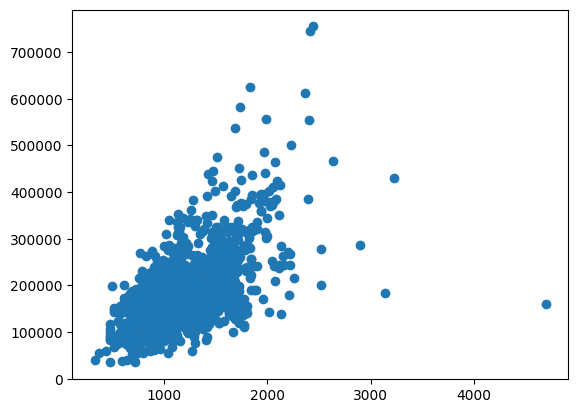

In [259]:
plt.scatter(x='fstFlrSF',y='SalePrice', data = train_ori)

In [260]:
train_ori.query('fstFlrSF>4000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


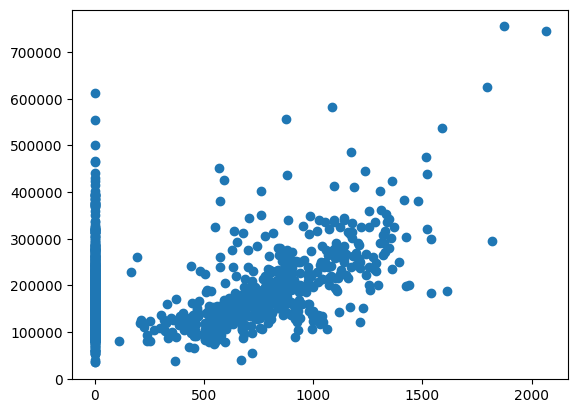

In [261]:
plt.scatter(x='sndFlrSF',y='SalePrice', data = train_ori)

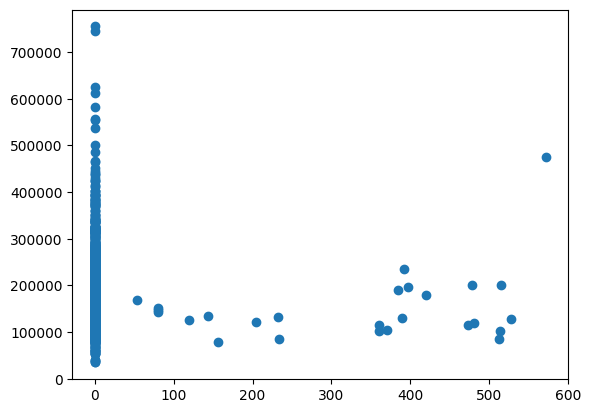

In [262]:
plt.scatter(x='LowQualFinSF',y='SalePrice', data = train_ori)

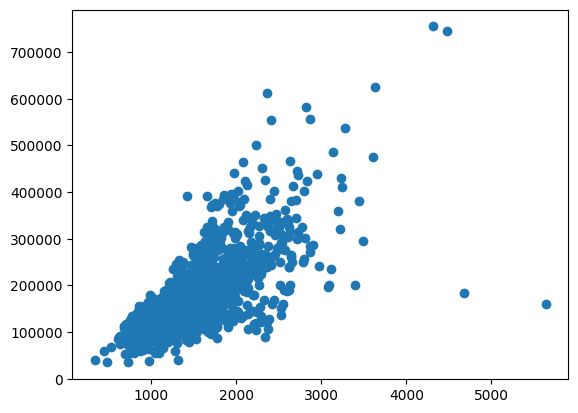

In [263]:
plt.scatter(x='GrLivArea',y='SalePrice', data = train_ori)

In [264]:
train_ori.query('GrLivArea>4000 and SalePrice<300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


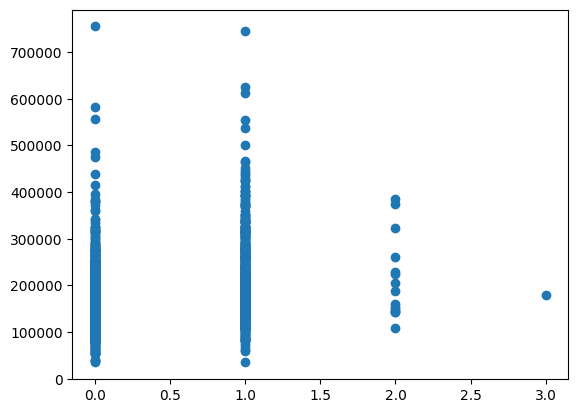

In [265]:
plt.scatter(x='BsmtFullBath',y='SalePrice', data = train_ori)

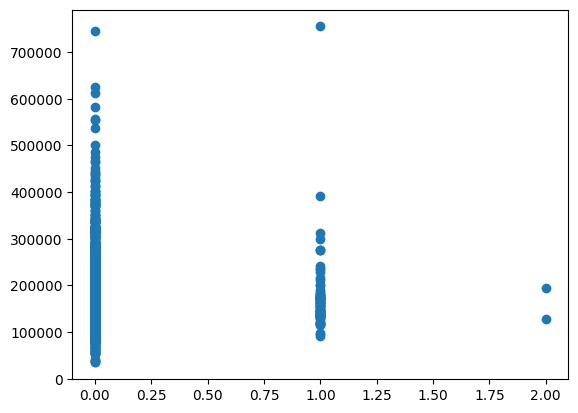

In [266]:
plt.scatter(x='BsmtHalfBath',y='SalePrice', data = train_ori)

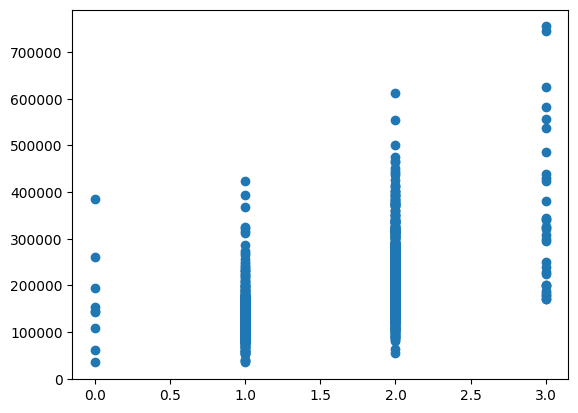

In [267]:
plt.scatter(x='FullBath',y='SalePrice', data = train_ori)

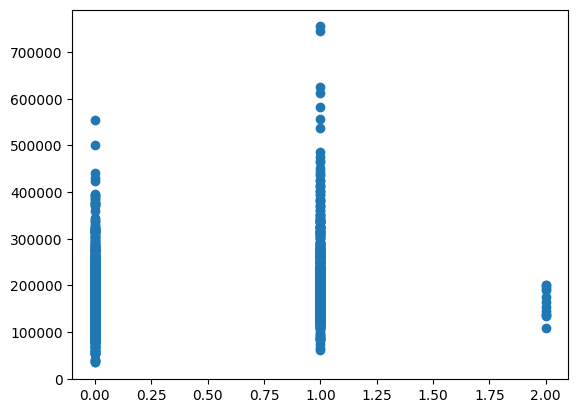

In [268]:
plt.scatter(x='HalfBath',y='SalePrice', data = train_ori)

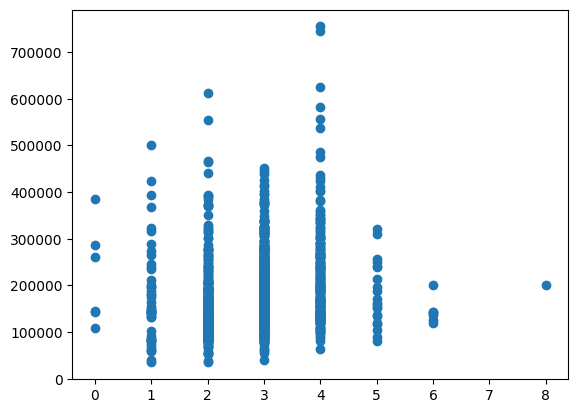

In [269]:
plt.scatter(x='BedroomAbvGr',y='SalePrice', data = train_ori)

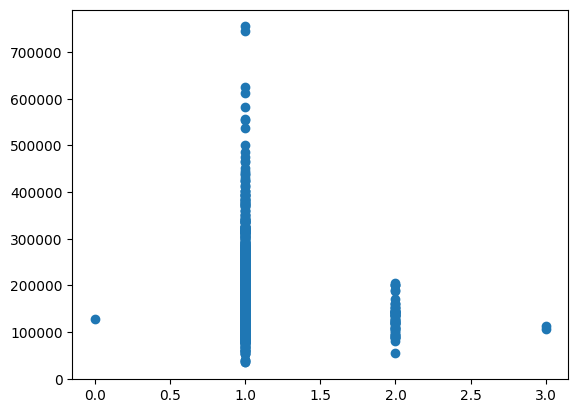

In [270]:
plt.scatter(x='KitchenAbvGr',y='SalePrice', data = train_ori)

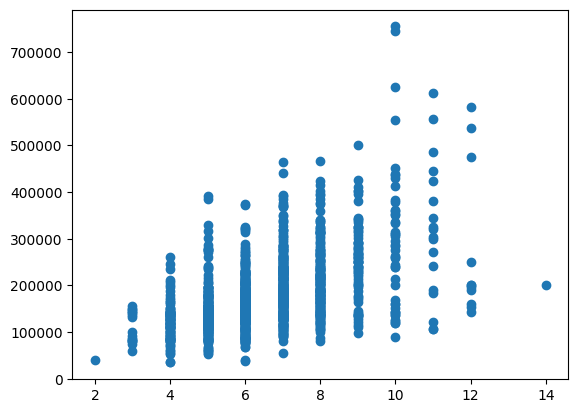

In [271]:
plt.scatter(x='TotRmsAbvGrd',y='SalePrice', data = train_ori)

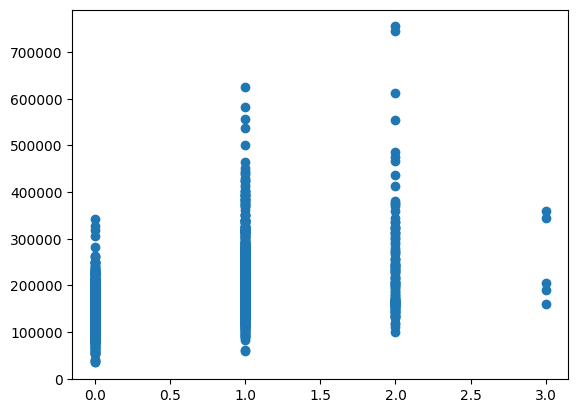

In [272]:
plt.scatter(x='Fireplaces',y='SalePrice', data = train_ori)

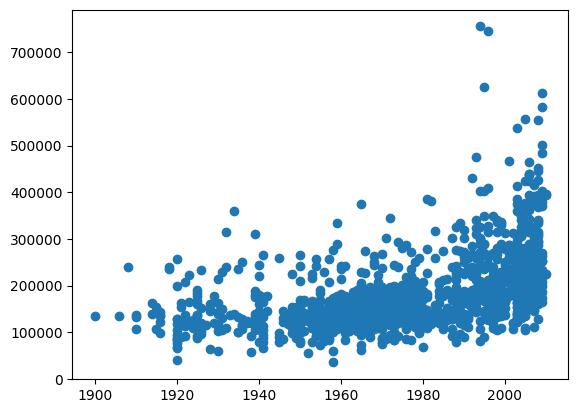

In [273]:
plt.scatter(x='GarageYrBlt',y='SalePrice', data = train_ori)

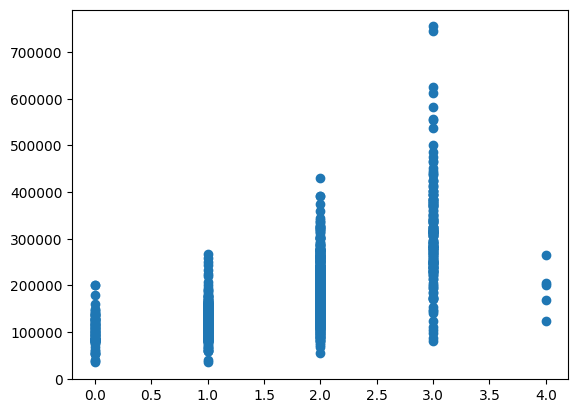

In [274]:
plt.scatter(x='GarageCars',y='SalePrice', data = train_ori)

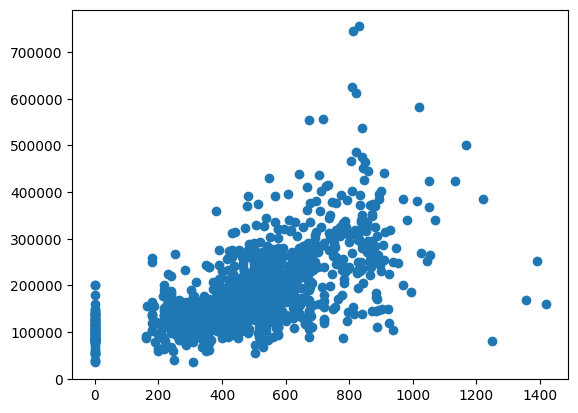

In [275]:
plt.scatter(x='GarageArea',y='SalePrice', data = train_ori)

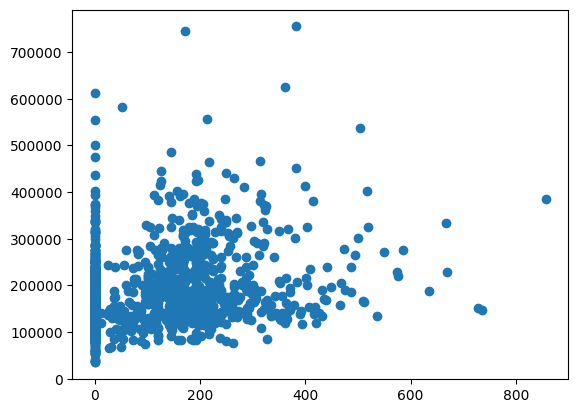

In [276]:
plt.scatter(x='WoodDeckSF',y='SalePrice', data = train_ori)

In [277]:
train_ori.query('WoodDeckSF>800')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


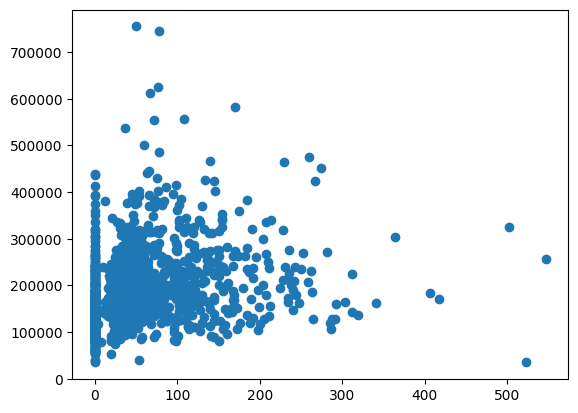

In [278]:
plt.scatter(x='OpenPorchSF',y='SalePrice', data = train_ori)

In [279]:
train_ori.query('OpenPorchSF>500 and SalePrice<100000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


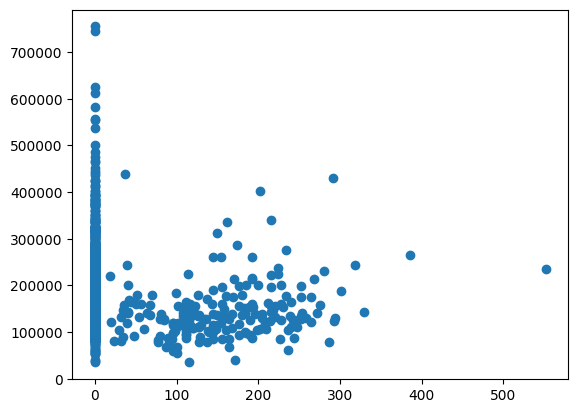

In [280]:
plt.scatter(x='EnclosedPorch',y='SalePrice', data = train_ori)

In [281]:
train_ori.query('SalePrice>700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


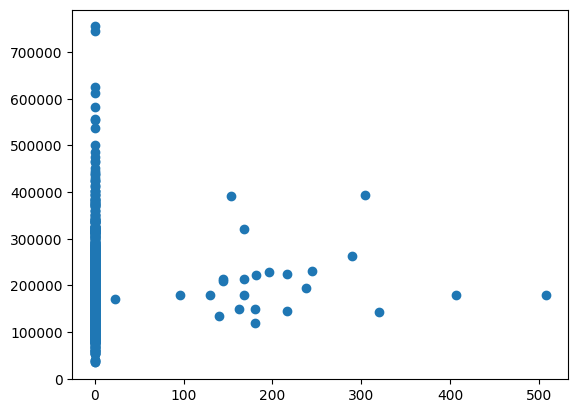

In [282]:
plt.scatter(x='3SsnPorch',y='SalePrice', data = train_ori)

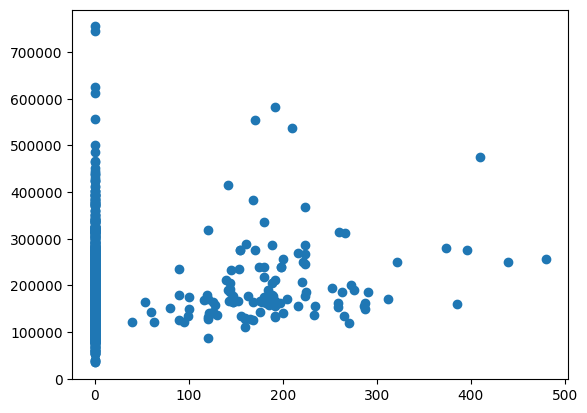

In [283]:
plt.scatter(x='ScreenPorch',y='SalePrice', data = train_ori)

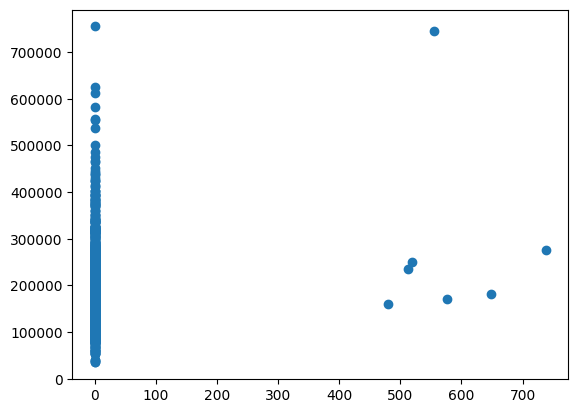

In [284]:
plt.scatter(x='PoolArea',y='SalePrice', data = train_ori)

In [285]:
train_ori.query('SalePrice>700000 and PoolArea==0')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


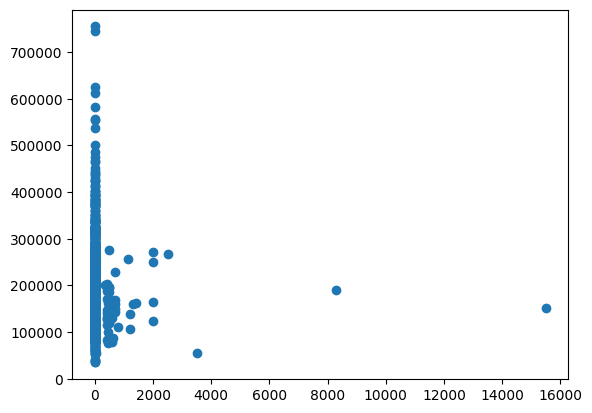

In [286]:
plt.scatter(x='MiscVal',y='SalePrice', data = train_ori)

In [287]:
train_ori.query('SalePrice<100000 and MiscVal>2000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
705,706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000


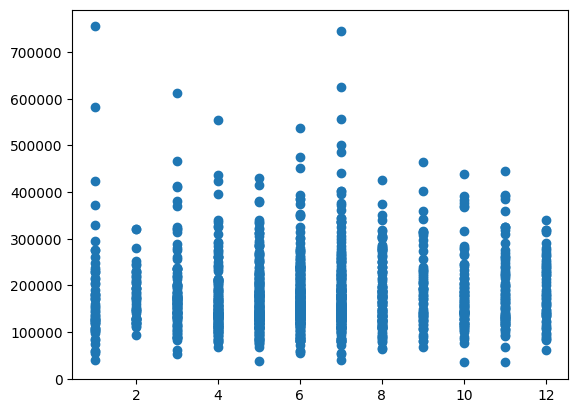

In [288]:
plt.scatter(x='MoSold',y='SalePrice', data = train_ori)

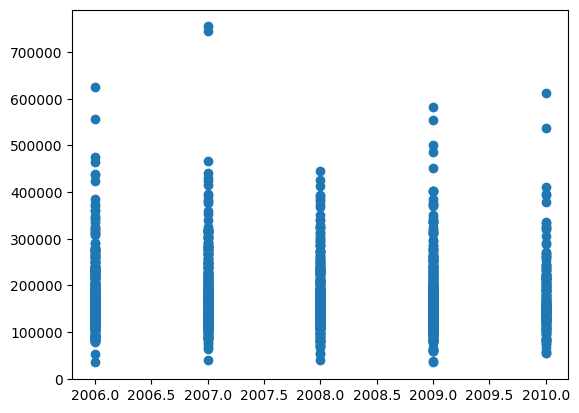

In [289]:
plt.scatter(x='YrSold',y='SalePrice', data = train_ori)

In [290]:
values=[935,1299,250,314,336,524,298,54,496,1183,692,706]

In [291]:
train_ori = train_ori[train_ori.Id.isin(values) == False]

In [292]:
pd.DataFrame(train_ori.isnull().sum().sort_values(ascending=False)).head(20)


,0
PoolQC,1443
MiscFeature,1397
Alley,1358
Fence,1169
MasVnrType,865
FireplaceQu,688
LotFrontage,257
GarageYrBlt,79
GarageCond,79
GarageType,79


In [293]:
train_ori['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [294]:
train_ori['PoolQC'].fillna('No', inplace=True)
test_ori['PoolQC'].fillna('No', inplace=True)

/tmp/ipykernel_34/1569365240.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['PoolQC'].fillna('No', inplace=True)
/tmp/ipykernel_34/1569365240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

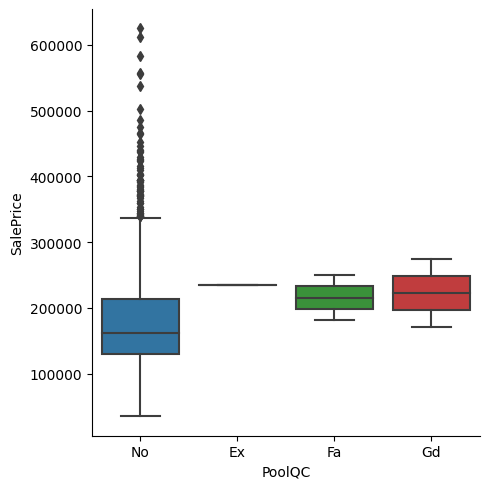

In [295]:
sns.catplot(data=train_ori, x="PoolQC", y="SalePrice", kind="box")

In [296]:
train_ori['MiscFeature'].unique()


array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [297]:
train_ori['MiscFeature'].fillna('No', inplace=True)
test_ori['MiscFeature'].fillna('No', inplace=True)

/tmp/ipykernel_34/2229464324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['MiscFeature'].fillna('No', inplace=True)
/tmp/ipykernel_34/2229464324.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

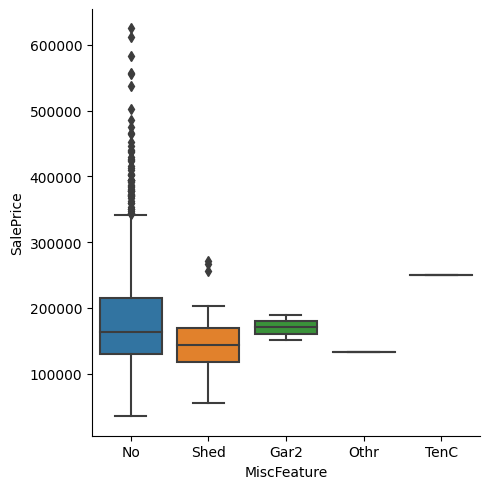

In [298]:
sns.catplot(data=train_ori, x="MiscFeature", y="SalePrice", kind="box")

In [299]:
train_ori['Alley'].unique()


array([nan, 'Grvl', 'Pave'], dtype=object)

In [300]:
train_ori['Alley'].fillna('No', inplace=True)
test_ori['Alley'].fillna('No', inplace=True)

/tmp/ipykernel_34/2787999807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['Alley'].fillna('No', inplace=True)
/tmp/ipykernel_34/2787999807.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

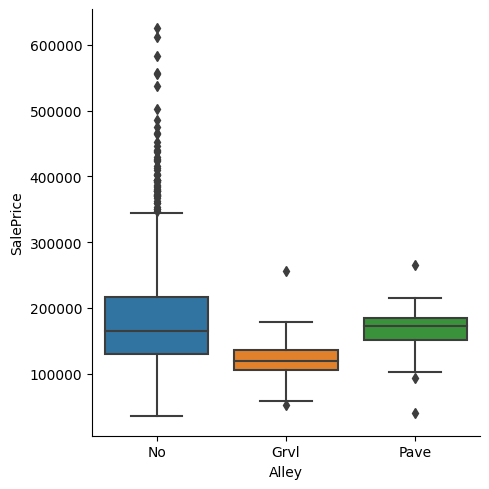

In [301]:
sns.catplot(data=train_ori, x="Alley", y="SalePrice", kind="box")

In [302]:
train_ori['Fence'].unique()


array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [303]:
train_ori['Fence'].fillna('No', inplace=True)
test_ori['Fence'].fillna('No', inplace=True)

/tmp/ipykernel_34/3175986645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['Fence'].fillna('No', inplace=True)
/tmp/ipykernel_34/3175986645.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

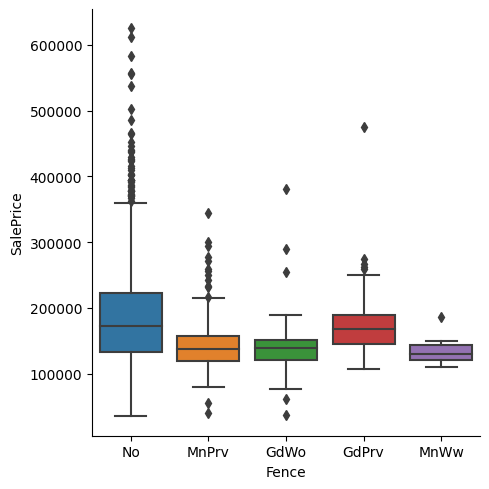

In [304]:
sns.catplot(data=train_ori, x="Fence", y="SalePrice", kind="box")

In [305]:
train_ori['MasVnrType'].unique()


array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [306]:
train_ori['MasVnrType'].fillna('No', inplace=True)
test_ori['MasVnrType'].fillna('No', inplace=True)

/tmp/ipykernel_34/4024922445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['MasVnrType'].fillna('No', inplace=True)
/tmp/ipykernel_34/4024922445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

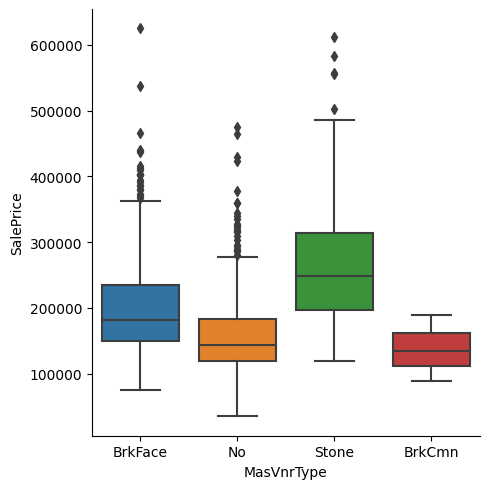

In [307]:
sns.catplot(data=train_ori, x="MasVnrType", y="SalePrice", kind="box")

In [308]:
train_ori['FireplaceQu'].unique()


array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [309]:
train_ori['FireplaceQu'].fillna('No', inplace=True)
test_ori['FireplaceQu'].fillna('No', inplace=True)

/tmp/ipykernel_34/990823839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['FireplaceQu'].fillna('No', inplace=True)
/tmp/ipykernel_34/990823839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

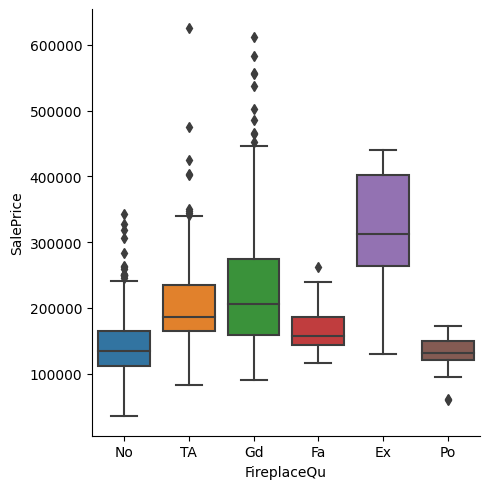

In [310]:
sns.catplot(data=train_ori, x="FireplaceQu", y="SalePrice", kind="box")

In [311]:
train_ori['LotFrontage']


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1448, dtype: float64

In [312]:
train_ori['LotFrontage'].fillna(0, inplace=True)
test_ori['LotFrontage'].fillna(0, inplace=True)


/tmp/ipykernel_34/1532017149.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_ori['LotFrontage'].fillna(0, inplace=True)


In [313]:
train_ori['GarageYrBlt'].fillna(0, inplace=True)
test_ori['GarageYrBlt'].fillna(0, inplace=True)

/tmp/ipykernel_34/82171379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['GarageYrBlt'].fillna(0, inplace=True)
/tmp/ipykernel_34/82171379.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [314]:
train_ori['GarageCond'].unique()


array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [315]:
train_ori['GarageCond'].fillna('No', inplace=True)
test_ori['GarageCond'].fillna('No', inplace=True)

/tmp/ipykernel_34/2514596756.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['GarageCond'].fillna('No', inplace=True)
/tmp/ipykernel_34/2514596756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [316]:
train_ori['GarageType'].unique()


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [317]:
train_ori['GarageType'].fillna('No', inplace=True)
test_ori['GarageType'].fillna('No', inplace=True)

/tmp/ipykernel_34/1309021963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['GarageType'].fillna('No', inplace=True)
/tmp/ipykernel_34/1309021963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [318]:
train_ori['GarageFinish'].unique()


array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [319]:
train_ori['GarageFinish'].fillna('No', inplace=True)
test_ori['GarageFinish'].fillna('No', inplace=True)

/tmp/ipykernel_34/2746266288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['GarageFinish'].fillna('No', inplace=True)
/tmp/ipykernel_34/2746266288.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [320]:
train_ori['GarageQual'].unique()


array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [321]:
train_ori['GarageQual'].fillna('No', inplace=True)
test_ori['GarageQual'].fillna('No', inplace=True)

/tmp/ipykernel_34/490234192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['GarageQual'].fillna('No', inplace=True)
/tmp/ipykernel_34/490234192.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [322]:
train_ori['BsmtFinType2'].fillna('No', inplace=True)
test_ori['BsmtFinType2'].fillna('No', inplace=True)

/tmp/ipykernel_34/2408368158.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['BsmtFinType2'].fillna('No', inplace=True)
/tmp/ipykernel_34/2408368158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [323]:
train_ori['BsmtExposure'].fillna('NoB', inplace=True)
test_ori['BsmtExposure'].fillna('NoB', inplace=True)

/tmp/ipykernel_34/2995408207.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['BsmtExposure'].fillna('NoB', inplace=True)
/tmp/ipykernel_34/2995408207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

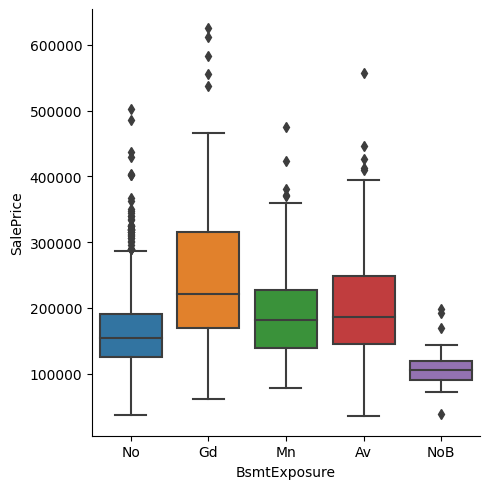

In [324]:
sns.catplot(data=train_ori, x="BsmtExposure", y="SalePrice", kind="box")

In [325]:
train_ori['BsmtQual'].unique()


array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [326]:
train_ori['BsmtQual'].fillna('No', inplace=True)
test_ori['BsmtQual'].fillna('No', inplace=True)

/tmp/ipykernel_34/10948760.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['BsmtQual'].fillna('No', inplace=True)
/tmp/ipykernel_34/10948760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [327]:
train_ori['BsmtCond'].fillna('No', inplace=True)
test_ori['BsmtCond'].fillna('No', inplace=True)

/tmp/ipykernel_34/1975326083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['BsmtCond'].fillna('No', inplace=True)
/tmp/ipykernel_34/1975326083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [328]:
train_ori['BsmtFinType1'].fillna('No', inplace=True)
test_ori['BsmtFinType1'].fillna('No', inplace=True)

/tmp/ipykernel_34/3803595387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['BsmtFinType1'].fillna('No', inplace=True)
/tmp/ipykernel_34/3803595387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [329]:
train_ori['MasVnrArea'].unique()


array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [330]:
train_ori['MasVnrArea'].fillna(0, inplace=True)
test_ori['MasVnrArea'].fillna(0, inplace=True)

/tmp/ipykernel_34/3780151468.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ori['MasVnrArea'].fillna(0, inplace=True)
/tmp/ipykernel_34/3780151468.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [331]:
pd.DataFrame(train_ori.isnull().sum().sort_values(ascending=False)).head(20)


,0
Electrical,1
CentralAir,0
GarageYrBlt,0
GarageType,0
FireplaceQu,0
Fireplaces,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0
KitchenAbvGr,0


In [332]:
nan_rows = train_ori[train_ori['Electrical'].isna()]


In [333]:
nan_rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2008,WD,Normal,167500


In [334]:
value=[1380]
train_ori = train_ori[train_ori.Id.isin(value) == False]

<Axes: >

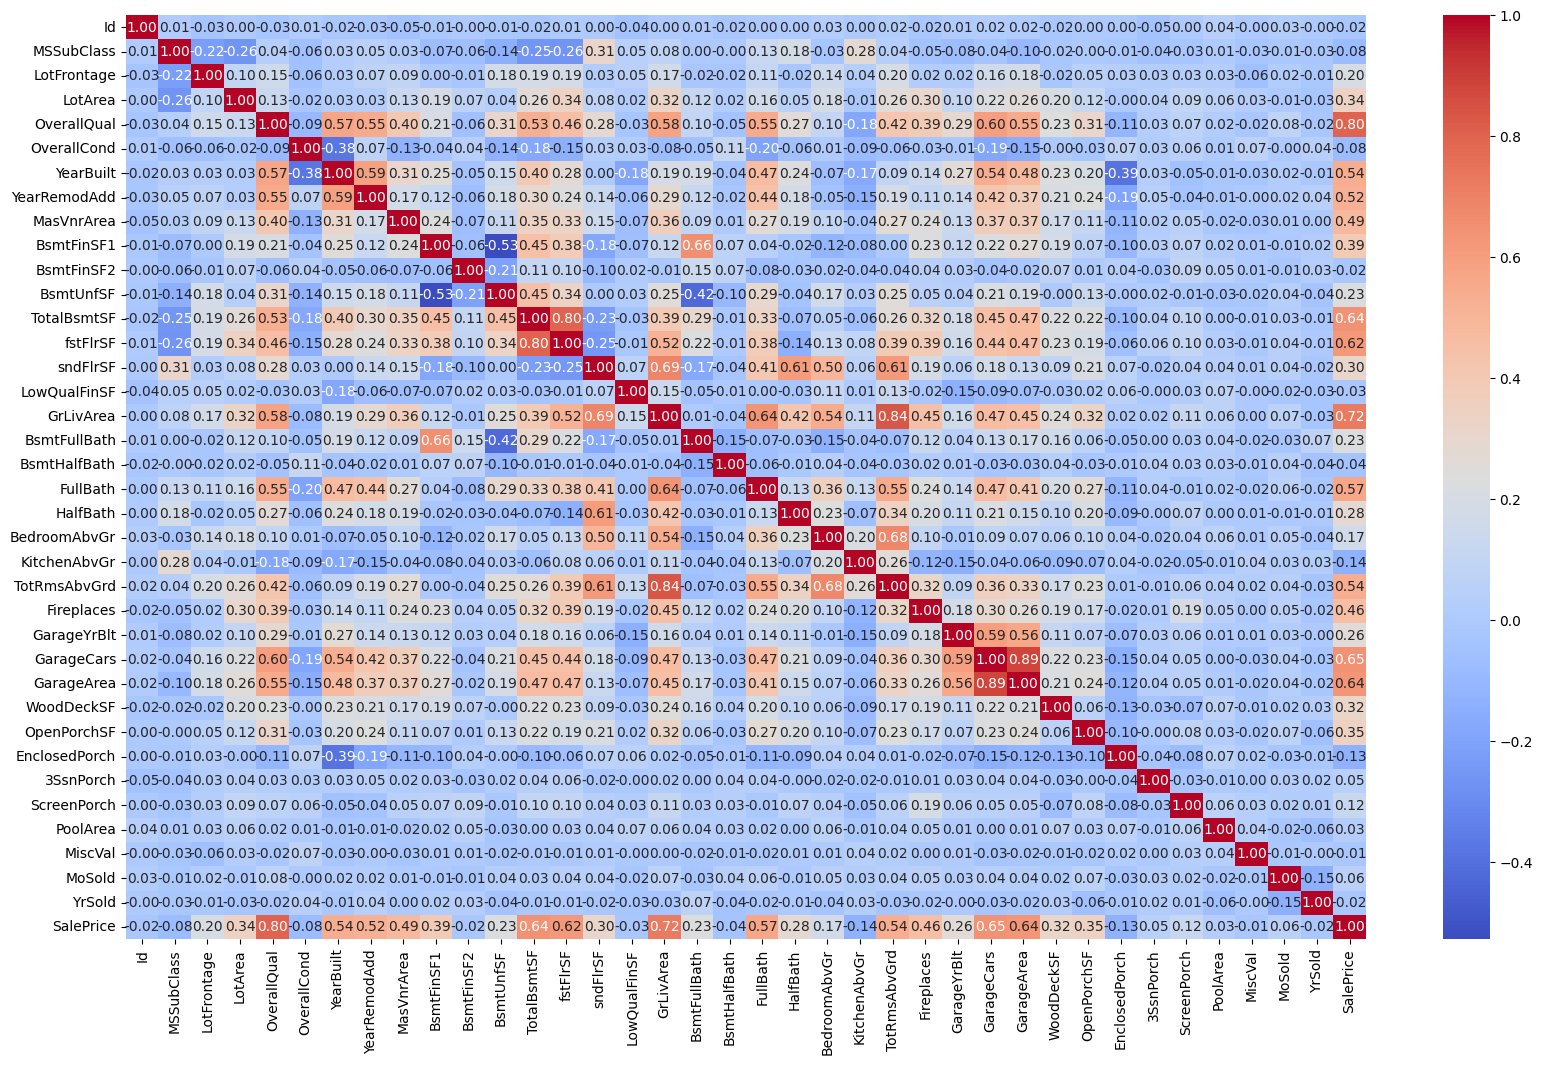

In [335]:
correlation_matrix = train_ori.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [336]:
train_ori = train_ori.drop(columns=['GarageArea','TotRmsAbvGrd'])
test_ori = test_ori.drop(columns=['GarageArea','TotRmsAbvGrd'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

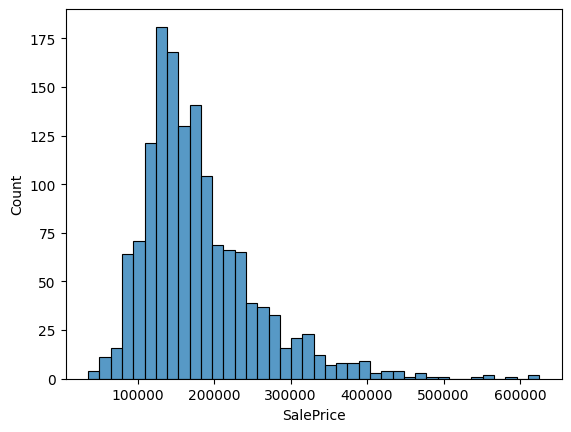

In [337]:
sns.histplot(
    train_ori,
    x=train_ori['SalePrice']
)

In [338]:
train_ori['SalePrice'] = np.log1p(train_ori['SalePrice'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

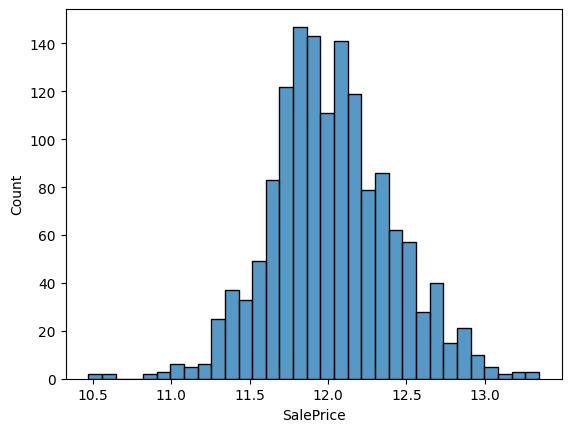

In [339]:
sns.histplot(
    train_ori,
    x=train_ori['SalePrice']
)

In [340]:
train_ori.dtypes[train_ori.dtypes=='object']


MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [341]:
train_ori.dtypes[train_ori.dtypes !='object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
fstFlrSF           int64
sndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [359]:
num_cols = train_ori.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice','Id')

In [343]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1','BsmtFinType2',  'CentralAir',  'Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond','PoolQC','GarageCond','Fence']

ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd','MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl','Alley','MiscFeature']

In [360]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'fstFlrSF', 'sndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [362]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [363]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [364]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [365]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [366]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [367]:
X = train_ori.drop('SalePrice', axis=1)
y = train_ori['SalePrice']

In [368]:
print(len(X.select_dtypes(include=['object']).columns))


43


In [369]:
len(ohe_cols)

21

In [370]:
len(ode_cols)

22

In [371]:
X_preprocessed = pipeline.fit_transform(X)

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [373]:
RFR = RandomForestRegressor(random_state=13)

In [375]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [376]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [377]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [378]:
np.sqrt(-1 * rfr_cv.best_score_)

0.1380482287075428

In [379]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 250}

In [380]:
test_ori.rename(columns = {'1stFlrSF':'fstFlrSF'}, inplace = True)
test_ori.rename(columns = {'2ndFlrSF':'sndFlrSF'}, inplace = True)

In [381]:
df_test_preprocess = pipeline.transform(test_ori)

In [382]:
y_stacking = np.exp(rfr_cv.predict(df_test_preprocess))

df_y_stacking_out = test_ori[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)

/tmp/ipykernel_34/589070343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['SalePrice'] = y_stacking


In [ ]:
test_ori

In [ ]:
XGB = XGBRegressor(random_state=13)

In [ ]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [ ]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
xgb_cv.fit(X_train, y_train)

In [ ]:
np.sqrt(-1 * xgb_cv.best_score_)

Submissiom


In [ ]:
df_test_preprocess = pipeline.transform(test_ori)

In [ ]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)